In [1]:
from PIL import Image
import os
import numpy as np

In [4]:
img_dir = "/mnt/analysis/e21072/h5test/run_0277/len90_ic600000_pads21_eps5_samps5_poly2/241372CUT_Date_12_20_2023/" # 1600p
#img_dir = "/mnt/analysis/e21072/h5test/run_0277/len90_ic600000_pads21_eps5_samps5_poly2/673876CUT_Date_12_20_2023" # 800p

imagelist = [ f for f in os.listdir(img_dir) if f.endswith(".png")]

filt_imglist = np.random.choice(imagelist, 1000, replace=False) #randomly select 1000 images

frames = []
for i in range(len(filt_imglist)):
    new_frame = Image.open(img_dir+filt_imglist[i])
    frames.append(new_frame)

frames[0].save('1600p.gif', format='GIF', append_images=frames[1:], save_all=True, duration=100, loop=0)

In [2]:
h5_dir = "/mnt/analysis/e17023/Adam/GADGET2/simOutput/hdf5/"
img_dir = "/mnt/analysis/e17023/Adam/GADGET2/simOutput/images/"

imagelist = [ f for f in os.listdir(img_dir) if f.endswith(".png")]
h5_list = [f.split(".h")[0] for f in os.listdir(h5_dir)]

for h5 in h5_list:
    filt_imglist = [f for f in imagelist if h5 in f]
    # create gif from images in filelist
    frames = []
    for i in range(len(filt_imglist)):
        new_frame = Image.open(img_dir+filt_imglist[i])
        frames.append(new_frame)
    
    # Save into a GIF file
    try:
        frames[0].save(f'/mnt/analysis/e17023/Adam/GADGET2/simOutput/gifs/{h5}.gif', format='GIF', append_images=frames[1:], save_all=True, duration=250, loop=0)
    except:
        print(f"Error with {h5}")
        continue

In [16]:
img_dir = "/mnt/analysis/e17023/Adam/GADGET2/simOutput/images/"
imagelist = [ f for f in os.listdir(img_dir) if f.endswith(".png")]

image_nums = set([int(f.split(".png")[0].split('_')[-1]) for f in imagelist])

for i in image_nums:
    filt_imglist = [f for f in imagelist if f"_{i}.png" in f]
    # create gif from images in filelist
    frames = []
    for i in range(len(filt_imglist)):
        new_frame = Image.open(img_dir+filt_imglist[i])
        frames.append(new_frame)
    
    # Save into a GIF file
    try:
        frames[0].save(f'/mnt/analysis/e17023/Adam/GADGET2/simOutput/gifs/events/{i}.gif', format='GIF', append_images=frames[1:], save_all=True, duration=250, loop=0)
    except:
        print(f"Error with {i}")
        continue

Error with 12


Text(0, 0.5, 'Percentage of Images')

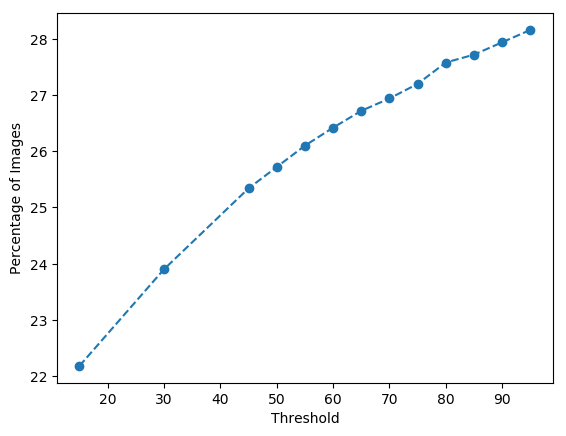

In [15]:
img_dir = "/mnt/analysis/e17023/Adam/GADGET2/simOutput/images/"
imagelist = [ f for f in os.listdir(img_dir) if f.endswith(".png")]

threshold = []
img_len = []

sims = set([f.split("_")[0] for f in imagelist])
# sort sims in order of threshold
sims = sorted(sims, key=lambda x: int(x.split("T")[0]))
for sim in sims:
    filt_imglist = [f for f in imagelist if sim in f]
    
    threshold.append(int(sim.split("T")[0]))
    img_len.append(len(filt_imglist)/5000 * 100)
    
import matplotlib.pyplot as plt
plt.plot(threshold, img_len, 'o--')
plt.xlabel("Threshold")
plt.ylabel("Percentage of Images")

In [3]:
#img_dir = "/mnt/analysis/e17023/Adam/GADGET2/simOutput/aug_images/"
#imagelist = [ f for f in os.listdir(img_dir) if f.endswith(".png")]
#frames = []
#for i in range(len(imagelist)):
#    new_frame = Image.open(img_dir+imagelist[i])
#    frames.append(new_frame)
#frames[0].save(f'/mnt/analysis/e17023/Adam/GADGET2/simOutput/aug.gif', format='GIF', append_images=frames[1:], save_all=True, duration=50, loop=0)